# Prediction of used car Price using Cardekho dataset 

In [1]:
import pandas as pd
import numpy as np 

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df["current Year"]=2022

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [9]:
df['car age']=df['current Year']- df['Year']

In [10]:
df.drop(['Year', 'current Year'], axis=1, inplace= True)

In [11]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# # Create Dummy variables for categorical variable 

In [12]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [14]:
df.drop('Car_Name', axis=1, inplace=True)

In [15]:
df= pd.get_dummies(df,drop_first= True)
# Dummy variable trap 

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


# # #`Finding the correlation. It has been done after removing the 'object features'

In [26]:
corr_matrix=df.corr()
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

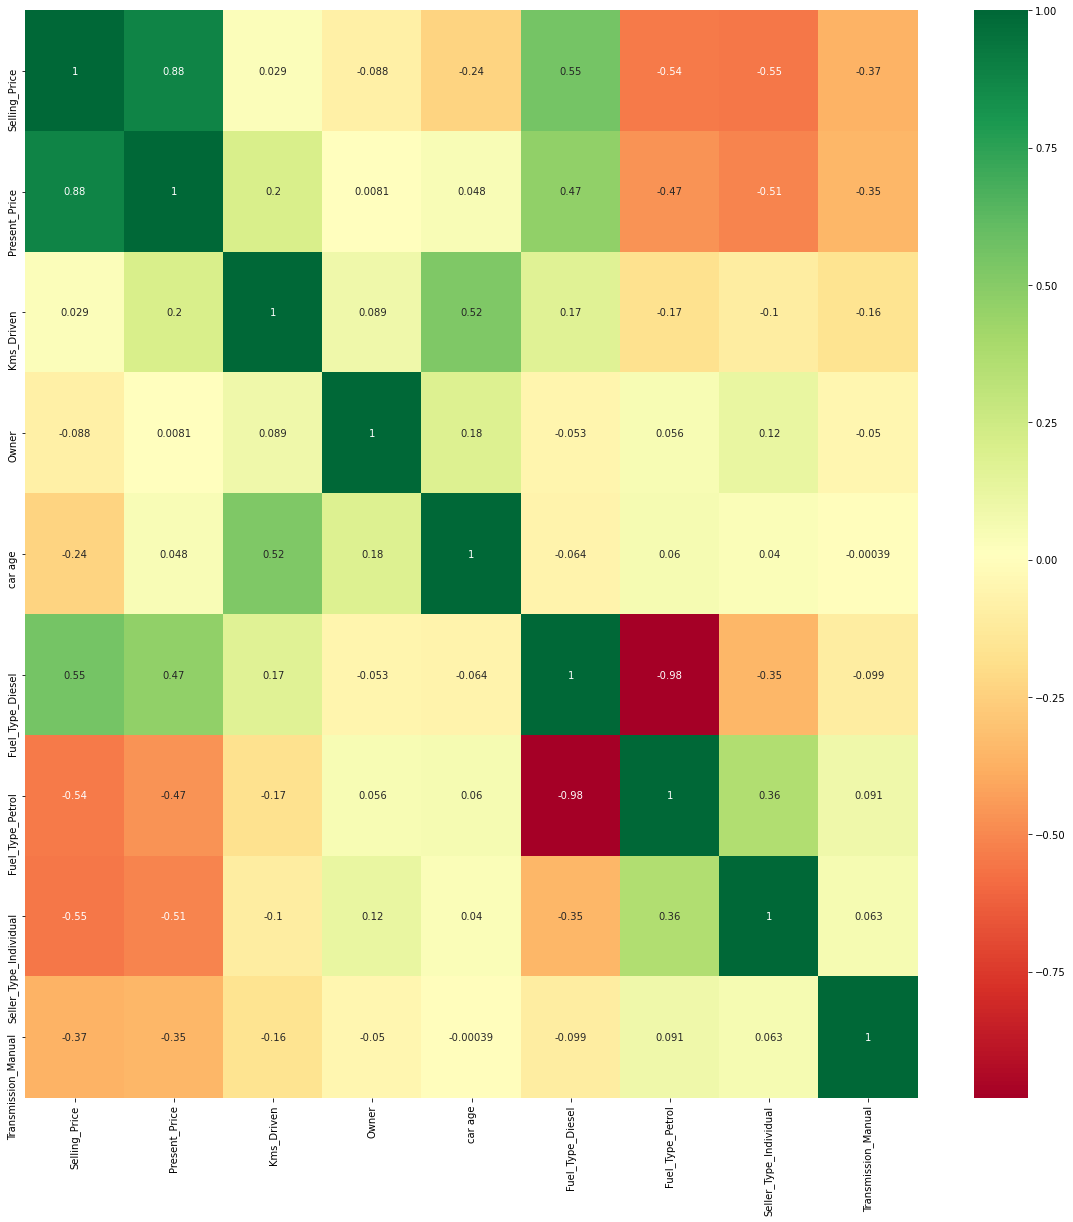

In [19]:
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Finding out the X and y and split it into train and test dataset 

In [27]:
X=df.drop('Selling_Price', axis=1)
y= df['Selling_Price']

In [28]:
X.head()

,Present_Price,Kms_Driven,Owner,car age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [29]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=52, test_size=.3)

In [32]:
X_train.head()

,Present_Price,Kms_Driven,Owner,car age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
53,30.61,135000,0,9,1,0,1,0
211,14.79,43535,0,7,1,0,0,1
299,12.50,9000,0,5,1,0,0,1
23,3.46,45280,0,8,0,1,0,1
87,13.74,56000,0,10,0,1,0,1


In [37]:
X.shape

(301, 8)

### New Concept: Feature Importance

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
model.feature_importances_

array([0.3915343 , 0.04420044, 0.00082725, 0.07650196, 0.21292471,
       0.01536774, 0.12054274, 0.13810085])

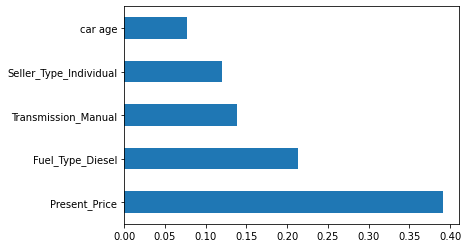

In [38]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

### Train the model and predict the results using it 

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [42]:
## Hyperparameters

n_estimators=[int(x) for x in np.linspace(100,1500,15)] # no of trees in the random forest 
max_features= ['auto', 'sqrt'] # No of features to consider at every split
max_depth = [int(x) for x in np.linspace(5,30,6)]

min_samples_split= [2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
random_grid ={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
# RandomizeSearchCV will search best paramets . it is faster than GridSearchCV

In [48]:
rf_random= RandomizedSearchCV(estimator= rf, 
                             param_distributions= random_grid, 
                             scoring='neg_mean_squared_error',
                            n_iter=10,
                            cv=5,
                            verbose=2, 
                            random_state=52,
                            n_jobs=1)

#n_jobs means how many cores of the laptop are used 

In [49]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1300; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1300; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=52, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
predictions= rf_random.predict(X_test)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

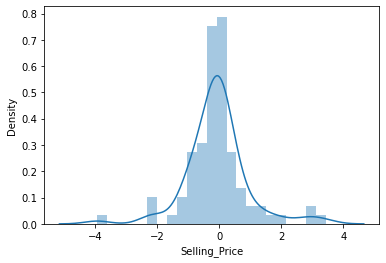

In [53]:
sns.distplot(y_test-predictions)

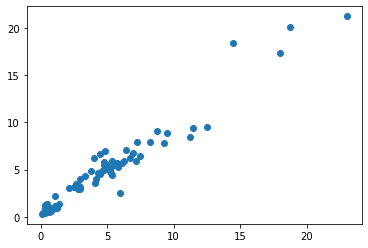

In [55]:
plt.scatter(y_test, predictions)

In [56]:
# The model is created. Time for deployment of model 

### Model Deployment

In [57]:
import pickle
#Open a file where you want to store the data
file= open('car_price_prediction_model.pkl','wb')

#dump information to that file 
pickle.dump(rf_random, file)